In [1]:
import matplotlib
matplotlib.use("nbagg")

import numpy as np
import matplotlib.pyplot as plt

from tkinter import Tk
from tkinter.filedialog import askopenfilename


In [45]:
def readInPlot(measurement):
    root = Tk()
    filename = askopenfilename()
    f = open(filename,'r')

    root.withdraw()

    index = 1;
    xList = []
    yList = []
    stdList = []
    #xTitle = 'Temp'
    #yTitle = 'Mob'
    
    
    n = .0016*(10**21)
    e = 1.602*(10**(-19))
    index = 1

    for line in f:
        newline = line.split()

        if len(newline) ==2:
            if index == 1:
                xTitle = newline[0]
                yTitle = newline[1]
                #print(xTitle)
                #print(yTitle)
            else:
                xList.append(float(newline[0]))
                
                mobility = float(newline[1])
                conductivity = n*e*mobility
                #yList.append(conductivity)
                yList.append(mobility)
        elif len(newline) == 3:
            if index == 1:
                xTitle = newline[0]
                yTitle = newline[1]
            else:
                
                xList.append(float(newline[0]))
                mobility = float(newline[1])
                conductivity = n*e*mobility
                #yList.append(float(newline[1]))
                
                if measurement == 'mobility':
                    yList.append(mobility)
                    stdList.append(float(newline[2]))
                elif measurement == 'conductivity':
                    yList.append(conductivity)
                    stdList.append(float(newline[2]))
                #stdList.append(float(newline[2]))
        index += 1
    f.close()

    xArray = np.asarray(xList)
    yArray = np.asarray(yList)
    
    plotArray = []
    plotArray.append(xArray)
    plotArray.append(yArray)
    plotArray.append(xTitle)
    plotArray.append(yTitle)
    if len(stdList) != 0:
        stdArray = np.asarray(stdList)
        plotArray.append(stdArray)
        #plt.plot(xArray,yArray,linestyle = '--',marker='o')
        #plt.xlabel(xTitle)
        #plt.ylabel(yTitle)
    #else:
    #    stdArray = np.asarray(stdList)
    #    plt.errorbar(xArray,yArray,xerr=None,yerr = stdArray,linestyle = '--',marker = 'o')
        #plt.xlabel(xTitle)
        #plt.ylabel(yTitle)
        
    return plotArray

<IPython.core.display.Javascript object>


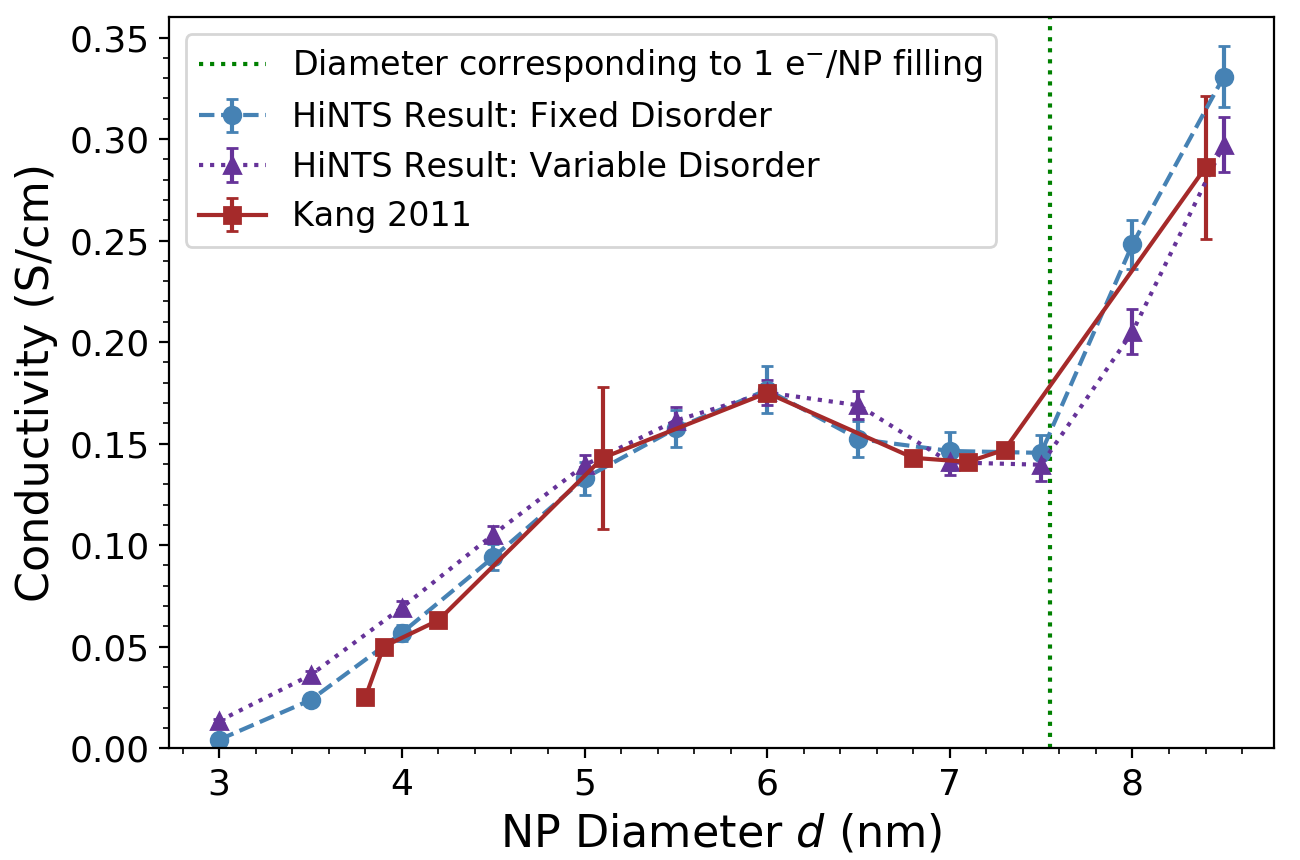

In [52]:
i = 1
plotList = []
eList = [76, 109, 150, 199, 259, 329, 411, 506, 614, 736, 874]
e_per_npList = [item/400.0 for item in eList]
e_per_npArray = np.asarray(e_per_npList)

#Kang values:
dList = [3.8, 3.9, 4.2, 5.1, 6.0, 6.8, 7.1, 7.3, 8.4]
cList = [.025, .050, .063, .143, .175, .143, .141, .147, .286]
eList = [0,0,0,.035,0,0,0,0,.035]

dArray = np.asarray(dList)
cArray = np.asarray(cList)
eArray = np.asarray(eList)

plotNumber  = 2

if plotNumber == 1:
    plotArray = readInPlot('conductivity')
    
    
    fig, ax = plt.subplots(figsize=(6.5,4.3))
    plt.subplots_adjust(left=0.15, bottom = 0.15, right = 0.98, top = 0.97, wspace =0, hspace = 0)
    plt.rc('font', size=10)  
    if len(plotArray) == 2:
            xArray = plotArray[0]
            yArray = plotArray[1]
            plt.plot(xArray,yArray,linestyle = '--',marker='o')
    else: 
        xArray = plotArray[0]
        yArray = plotArray[1]
        stdArray = plotArray[4]
        plt.errorbar(xArray,yArray,xerr=None,yerr = stdArray,linestyle = '--',marker = 'o', label = 'HiNTS Results', color = 'steelblue', ecolor='steelblue', capsize = 2)
    
    plt.errorbar(dArray,cArray,xerr=None,yerr = eArray,linestyle = '-',marker ='s',label = 'Kang 2011',color='brown', ecolor='brown', capsize = 2)
    plt.axvline(x=7.55,label = 'Diameter corresponding to 1 e$^{-}$/NP filling', color = 'green', linestyle = ':')
    plt.yscale("linear")
    plt.xlabel("NP Diameter $d$ (nm)",fontsize=16)
    plt.ylabel("Conductivity (S/cm)",fontsize=16)
    #plt.title("Conductivity vs NP Diameter")
    ax.set_ylim(0,0.36)
    plt.legend()
    ax.minorticks_on()
    plt.setp(ax.get_xticklabels(),fontsize=13)
    plt.setp(ax.get_yticklabels(),fontsize=13)
    plt.savefig('ConductivityVsDiameter.png', dpi=300, format='png')
    plt.show()
    
elif plotNumber == 2:
    plotArrays = []
    plotArrays.append(readInPlot('mobility'))
    plotArrays.append(readInPlot('conductivity'))
    
    fig, ax = plt.subplots(figsize=(6.5,4.3))
    plt.subplots_adjust(left=0.13, bottom = 0.13, right = 0.98, top = 0.98, wspace =0, hspace = 0)
    plt.rc('font', size=10) 
    
    for n, plotArray in enumerate(plotArrays):
        if len(plotArray) == 2:
                xArray = plotArray[0]
                yArray = plotArray[1]
                plt.plot(xArray,yArray,linestyle = '--',marker='o')
        else: 
            xArray = plotArray[0]
            yArray = plotArray[1]
            stdArray = plotArray[4]
            
            if n == 0:
                plotLabel = 'HiNTS Result: Fixed Disorder'
                markerStyle = 'o'
                plotColor = 'steelblue'
                plotStyle = '--'
            else:
                plotLabel = 'HiNTS Result: Variable Disorder'
                markerStyle = '^'
                plotColor = 'rebeccapurple'
                plotStyle = 'dotted'
                
            plt.errorbar(xArray,yArray,xerr=None,yerr = stdArray,linestyle = plotStyle,marker = markerStyle, label = plotLabel, color = plotColor, ecolor=plotColor, capsize = 2)
    
    plt.errorbar(dArray,cArray,xerr=None,yerr = eArray,linestyle = '-',marker ='s',label = 'Kang 2011',color='brown', ecolor='brown', capsize = 2)
    plt.axvline(x=7.55,label = 'Diameter corresponding to 1 e$^{-}$/NP filling', color = 'green', linestyle = ':')
    plt.yscale("linear")
    plt.xlabel("NP Diameter $d$ (nm)",fontsize=16)
    plt.ylabel("Conductivity (S/cm)",fontsize=16)
    #plt.title("Conductivity vs NP Diameter")
    ax.set_ylim(0,0.36)
    plt.legend(fontsize=12)
    ax.minorticks_on()
    plt.setp(ax.get_xticklabels(),fontsize=13)
    plt.setp(ax.get_yticklabels(),fontsize=13)
    plt.savefig('ConductivityVsDiameter_v2.png', dpi=300, format='png')
    plt.show()
        
elif plotNumber > 2:
    fig, ax1 = plt.subplots()
    while i <= plotNumber:
        plotArray = readInPlot()
        if len(plotArray) == 2:
            xArray = plotArray[0]
            yArray = plotArray[1]
            labelString = ("Screening Factor: %i" %i)
            plotList.append(ax1.plot(xArray,yArray,linestyle = '--',marker='o',label = labelString))
        else: 
            xArray = plotArray[0]
            yArray = plotArray[1]
            stdArray = plotArray[4]
            labelString = ("Screening Factor: %i" %i)
            plotList.append(ax1.errorbar(xArray,yArray,xerr=None,yerr = stdArray,linestyle = '--',marker = 'o', label = labelString))
        i += 1

    ax2 = ax1.twinx()
    ax2.plot(xArray,e_per_npArray,linestyle = '-',marker ='s',label = 'electrons per np',color='brown')
    ax2.set_ylabel('electrons per np')
    ax2.set_yscale("linear")
    ax2.legend(loc = 4)

    ax1.set_yscale("linear")
    ax1.set_xlabel(plotArray[2])
    ax1.set_ylabel(plotArray[3])
    ax1.legend(handles = plotList)

    #plt.title("Conductivity vs NP Diameter: Linear Disorder")
    fig.tight_layout()
    plt.show()